In [124]:
import pandas as pd
df1 = pd.read_fwf('a.txt', encoding = "utf_16_le", engine = 'python', header = None)

In [125]:
df1.columns =['a']
#df1.astype('int32')

In [171]:
df2 = pd.read_fwf('b.txt', encoding = "utf_16_le", engine = 'python', header = None)

In [172]:
df2

,0
0,0
1,20
2,92
3,48
4,16
...,...
9995,59
9996,83
9997,97
9998,85


In [160]:
df2.columns =['b']

In [129]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import math
import sys

In [130]:
df1.dropna(axis=0)
#df1.replace(0,np.nan, inplace = True)

,a
0,52
1,52
2,56
3,59
4,52
...,...
9995,55
9996,47
9997,43
9998,57


In [173]:
df2

,0
0,0
1,20
2,92
3,48
4,16
...,...
9995,59
9996,83
9997,97
9998,85


In [175]:
df2.dropna(axis =0)
df2.replace(0,np.nan, inplace=True)
#df2.astype('int64')

In [185]:
df2 =df2.where(pd.notnull(df2), df2.mean(), axis='columns').astype('int64')

In [186]:
# case1.df2의 시계열 결측값 0은 연속함수로 0이나 NaN으로 대체할 수없으므로 데이터간의 평균 값으로 대체하여 전처리한다. 
#case2. 누적함수를 그리다보니 이전값 대체는 선형함수를 만들어내는 것 같아서 a행의 값으로 결측값을 대체해보기로한다.
#            df2.fillna(method= 'bfill')
# df2.replace(0,np.nan, inplace = True)
# df2['b'] = np.where(pd.isnull(df2['b'])==True, df1['a'], df2['b'])

In [191]:
df2.columns =['b']
df2

,b
0,49
1,20
2,92
3,48
4,16
...,...
9995,59
9996,83
9997,97
9998,85


In [53]:
# new_df1= df1.dropna(axis=0)
# new_df1 = new_df1.fillna(method = 'ffill')
# new_df2 =df2.dropna(axis=0)
# new_df2 = new_df2.fillna(method = 'ffill')

In [192]:
np_df1 = df1.to_numpy()

In [193]:
np_df2 =df2.to_numpy().astype('int')

In [194]:
x_range = np.arange(1,100,1)

In [195]:
y_range = np_df1

In [196]:
df2.rolling(window=10000)
df2.mean()

b    49.4959
dtype: float64

In [197]:
import pylab as plt

N = x_range
X = y_range
counts, bins = np.histogram(X,bins=50, density=True)
bins = bins[:-1] + (bins[1] - bins[0])/2

print (np.trapz(counts, bins))

0.9997000000000001


In [198]:
df1.mean()

a    49.9491
dtype: float64

In [199]:
df2.mean()

b    49.4959
dtype: float64

In [200]:
N= 10000
mu = 49.9491
rv = stats.binom(N,mu)

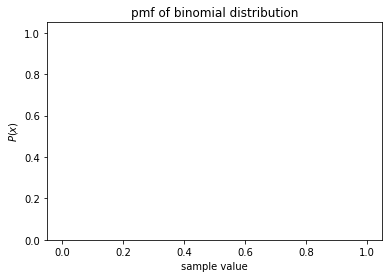

In [201]:
xx = np .arange ( N + 1 )
plt.bar ( xx, rv.pmf(xx), align = "center" )
plt.xlabel ( "sample value" )
plt.ylabel ( "$ P (x) $" )
plt.title ( "pmf of binomial distribution" )
plt.show ()

In [65]:
df2 = df2.astype('int')

In [202]:
df1

,a
0,52
1,52
2,56
3,59
4,52
...,...
9995,55
9996,47
9997,43
9998,57


In [203]:
df2

,b
0,49
1,20
2,92
3,48
4,16
...,...
9995,59
9996,83
9997,97
9998,85


In [204]:
ab_df = pd.concat([df1,df2], axis = 1)

In [205]:
ab_df

,a,b
0,52,49
1,52,20
2,56,92
3,59,48
4,52,16
...,...,...
9995,55,59
9996,47,83
9997,43,97
9998,57,85


In [206]:
ab_df.mean()

a    49.9491
b    49.4959
dtype: float64

In [207]:
ab_df['a'].median()

50.0

In [208]:
ab_df['a'].mean()

49.9491

In [209]:
ab_df['b'].mean()

49.4959

In [210]:
ab_df['b'].median()

49.0

In [211]:
ab_df

,a,b
0,52,49
1,52,20
2,56,92
3,59,48
4,52,16
...,...,...
9995,55,59
9996,47,83
9997,43,97
9998,57,85


In [212]:
np_ab_df = np.concatenate([np_df1, np_df2], axis = 0)

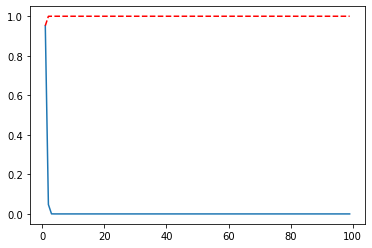

In [213]:
import numpy as np
from pylab import *

# Create some test data
dx = 1
X  = np.arange(1, 100, dx)
Y  = exp(-X ** 2)

# Normalize the data to a proper PDF
Y /= (dx * Y).sum()

# Compute the CDF
CY = np.cumsum(Y * dx)

# Plot both
plot(X, Y)
plot(X, CY, 'r--')

show()

array([[52],
       [52],
       [56],
       ...,
       [97],
       [85],
       [21]])

In [214]:
# define distributions
events = ['a','b']
p = np_df1
q = np_df2
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))

P=499491.000 Q=494959.000


In [215]:
# from matplotlib import pyplot
# # plot first distribution
# pyplot.subplot(2,1,1)
# pyplot.bar(events, p)
# # plot second distribution
# pyplot.subplot(2,1,2)
# pyplot.bar(events, q)
# # show the plot
# pyplot.show()

In [216]:
# example of calculating the kl divergence between two mass functions
from math import log2
def kl_divergence(p,q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

In [217]:
# calculate (P || Q)
kl_pq = kl_divergence(p, q)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence(q, p)
print('KL(Q || P): %.3f bits' % kl_qp)

KL(P || Q): 222497.557 bits
KL(Q || P): 139015.771 bits


/home/yjoh/.conda/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


In [218]:
# 8. a) different 
# KL(P || Q) != KL(Q || P)
# KL divergence score is not symmetrical.
# it also referred to as "relative entropy" (Pattern recognition and machine learning,2006)
# 출처:https://machinelearningmastery.com/divergence-between-probability-distributions/

In [219]:
# example of calculating the kl divergence (relative entropy) with scipy
from scipy.special import rel_entr
# define distributions
p = np_df1
q = np_df2
# calculate (P || Q)
kl_pq = rel_entr(p, q)
print('KL(P || Q): %.3f nats' % sum(kl_pq))
# calculate (Q || P)
kl_qp = rel_entr(q, p)
print('KL(Q || P): %.3f nats' % sum(kl_qp))

KL(P || Q): 154223.554 nats
KL(Q || P): 96358.389 nats


In [220]:
# calculate the js divergence
def js_divergence(p, q):
    m = 0.5 * (p + q)
    return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)

In [221]:
from math import log2
from math import sqrt
from numpy import asarray
# calculate JS(P || Q)
js_pq = js_divergence(p, q)
print('JS(P || Q) divergence: %.3f bits' % js_pq)
print('JS(P || Q) distance: %.3f' % sqrt(js_pq))

JS(P || Q) divergence: 40038.861 bits
JS(P || Q) distance: 200.097


/home/yjoh/.conda/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


In [222]:
# calculate JS(Q || P)
js_qp = js_divergence(q, p)
print('JS(Q || P) divergence: %.3f bits' % js_qp)
print('JS(Q || P) distance: %.3f' % sqrt(js_qp))

JS(Q || P) divergence: 40038.861 bits
JS(Q || P) distance: 200.097


/home/yjoh/.conda/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


In [223]:
# We can see that the calculation is symmetrical, giving the same score and distance measure for JS(P || Q) and JS(Q || P).

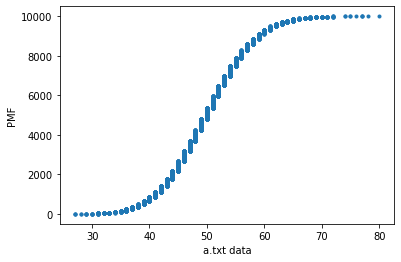

In [224]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x_range = np.sort(ab_df['a'])
y_range = np.arange(1,len(x_range)+1/len(x_range))
_ = plt.plot(x_range,y_range, marker = '.', linestyle = 'none')
_ = plt.xlabel('a.txt data')
_ = plt.ylabel('PMF')
plt.margins(0.05)
plt.show()

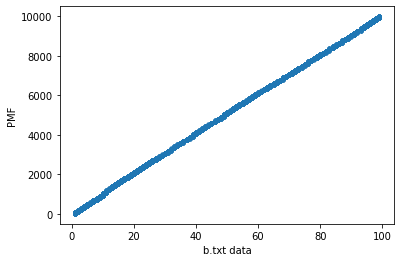

In [225]:
x_range = np.sort(ab_df['b'])
y_range = np.arange(1,len(x_range)+1/len(x_range))
_ = plt.plot(x_range,y_range, marker = '.', linestyle = 'none')
_ = plt.xlabel('b.txt data')
_ = plt.ylabel('PMF')
plt.margins(0.05)
plt.show()

In [226]:
#plot cdf of a.txt
counts, bin_edges = np.histogram(ab_df['a'], bins = 10, density = True)
pdf = counts / (sum(counts))
print(pdf);
print(bin_edges)

[0.005  0.0294 0.1084 0.2798 0.275  0.1891 0.0903 0.0191 0.0031 0.0008]
[27.  32.3 37.6 42.9 48.2 53.5 58.8 64.1 69.4 74.7 80. ]


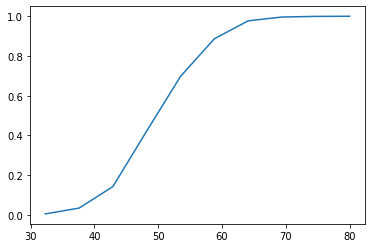

In [227]:
#compute cdf
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

In [228]:
#plot cdf of b.txt
counts, bin_edges = np.histogram(ab_df['b'], bins = 10, density = True)
pdf = counts / (sum(counts))
print(pdf);
print(bin_edges)

[0.1069 0.1043 0.0989 0.1036 0.0929 0.0992 0.0944 0.0996 0.0974 0.1028]
[ 1.  10.8 20.6 30.4 40.2 50.  59.8 69.6 79.4 89.2 99. ]


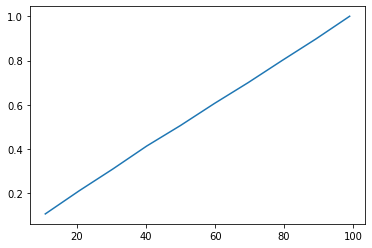

In [229]:
#compute cdf
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

In [230]:
def entropy(x, bins=None):
    x = ab_df['a']
    N   = x.shape[0]
    if bins is None:
        counts = np.bincount(x)
    else:
        counts = np.histogram(x, bins=bins)[0] # 0th idx is counts
    p   = counts[np.nonzero(counts)]/N # avoids log(0)
    H   = -np.dot( p, np.log2(p) )
    return H 

In [231]:
entropy(ab_df['a'])

4.848677778718739

In [232]:
def entropy(x, bins=None):
    x = ab_df['b']
    N   = x.shape[0]
    if bins is None:
        counts = np.bincount(x)
    else:
        counts = np.histogram(x, bins=bins)[0] # 0th idx is counts
    p   = counts[np.nonzero(counts)]/N # avoids log(0)
    H   = -np.dot( p, np.log2(p) )
    return H 

In [233]:
entropy(ab_df['b'])

6.61813855112409

In [234]:
def entropy(x, bins=None):
    x = ab_df
    N   = x.shape[0]
    if bins is None:
        counts = np.bincount(x)
    else:
        counts = np.histogram(x, bins=bins)[0] # 0th idx is counts
    p   = counts[np.nonzero(counts)]/N # avoids log(0)
    H   = -np.dot( p, np.log2(p) )
    return H 

In [235]:
periods = 20
tidx = pd.date_range(0, periods = periods, freq = 'T')
data = np.random.randn(periods)
ts = pd.Series(data = data, index = tidx, name = 'random sampling=20')
ts.describe()

count    20.000000
mean      0.428488
std       0.839414
min      -1.645001
25%       0.089325
50%       0.585502
75%       0.794602
max       1.769231
Name: random sampling=20, dtype: float64

In [252]:
#시계열 샘플 n= 20 추출
time_series_n_get_sample = ab_df.loc[[20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39],:]

In [254]:
time_series_n_get_sample.head(20)

,a,b
20,46,73
21,45,81
22,46,41
23,48,8
24,58,24
25,53,7
26,53,78
27,51,9
28,58,13
29,46,72


In [260]:
#n = 20인 time_series_n_get_sample의 cross entropy H(P,Q) 구하기 
def cross_entropy(x, y):
    """ Computes cross entropy between two distributions.
    Input: x: iterabale of N non-negative values
           y: iterabale of N non-negative values
    Returns: scalar
    """

    if np.any(x < 0) or np.any(y < 0):
        raise ValueError('Negative values exist.')

    # Force to proper probability mass function.
    x = np.array(x, dtype=np.float)
    y = np.array(y, dtype=np.float)
    x /= np.sum(x)
    y /= np.sum(y)

    # Ignore zero 'y' elements.
    mask = y > 0
    x = x[mask]
    y = y[mask]    
    ce = -np.sum(x * np.log(y)) 
    return ce

def cross_entropy_via_scipy(x, y):
        ''' SEE: https://en.wikipedia.org/wiki/Cross_entropy'''
        return  entropy(x) + entropy(x, y)

from scipy.stats import entropy, truncnorm

x = truncnorm.rvs(0.1, 2, size=100)
y = truncnorm.rvs(0.1, 2, size=100)
print (np.isclose(cross_entropy(x, y), cross_entropy_via_scipy(x, y)))

True


In [261]:
cross_entropy(time_series_n_get_sample['a'],time_series_n_get_sample['b'])

3.287789895407153

In [267]:
# define distributions
events = ['a','b']
P = time_series_n_get_sample['a'].to_numpy()
Q = time_series_n_get_sample['b'].to_numpy()
print('P=%.3f Q=%.3f' % (sum(P), sum(Q)))

P=1009.000 Q=949.000


In [268]:
# example of calculating the kl divergence between two mass functions
from math import log2
def kl_divergence(p,q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

In [269]:
# calculate (P || Q)
kl_pq = kl_divergence(P, Q)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence(Q, P)
print('KL(Q || P): %.3f bits' % kl_qp)

KL(P || Q): 528.784 bits
KL(Q || P): 221.243 bits


/home/yjoh/.conda/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


In [270]:
#8.전혀다르다.
# KL(P || Q) != KL(Q || P)
# KL divergence score is not symmetrical.

In [271]:
#9.
# As such, we can calculate the cross-entropy by adding the entropy of the distribution plus the additional entropy calculated by the KL divergence. 
#This is intuitive, given the definition of both calculations; for example:
# H(P, Q) = H(P) + KL(P || Q)
cross_entropy(p,q)

9.500113212652087

In [272]:
#10. same.
# H(P, Q) = H(P) + KL(P || Q)

In [273]:
# calculate the js divergence
def js_divergence_sample(P, Q):
    m = 0.5 * (P + Q)
    return 0.5 * kl_divergence(P, m) + 0.5 * kl_divergence(Q, m)

In [274]:
# calculate JS(P || Q)
js_pq_sample = js_divergence(P, Q)
print('JS(P || Q) divergence: %.3f bits' % js_pq_sample)
print('JS(P || Q) distance: %.3f' % sqrt(js_pq_sample))

JS(P || Q) divergence: 86.535 bits
JS(P || Q) distance: 9.302


/home/yjoh/.conda/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


In [275]:
# calculate JS(Q || P)
js_qp_sample = js_divergence(Q, P)
print('JS(Q || P) divergence: %.3f bits' % js_qp_sample)
print('JS(Q || P) distance: %.3f' % sqrt(js_qp_sample))

JS(Q || P) divergence: 86.535 bits
JS(Q || P) distance: 9.302


/home/yjoh/.conda/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


In [276]:
# 13.same

In [277]:
#14. why cross entropy is widely used as a loss function in ML problems. 

In [ ]:
#pros of KL divergence as a distance matric:
#cons of KL divergence as a distance matric:
#why it is useful /not useful?